In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/AI Project/train_data_final.csv")
user_info = pd.read_csv("/content/drive/MyDrive/AI Project/user_info_final.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/AI Project/test.csv")

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52695 entries, 0 to 52694
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      52695 non-null  int64
 1   merchant_id  52695 non-null  int64
 2   label        52695 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


In [ ]:
test_data.label.unique()

array([0, 1])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219557 entries, 0 to 219556
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      219557 non-null  float64
 1   merchant_id  219557 non-null  float64
 2   label        219557 non-null  float64
dtypes: float64(3)
memory usage: 5.0 MB


In [ ]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422741 entries, 0 to 422740
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         422741 non-null  int64  
 1   age             422741 non-null  float64
 2   sex             422741 non-null  object 
 3   marital_status  422741 non-null  object 
 4   job_industry    422741 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 16.1+ MB


In [ ]:
user_log = pd.read_csv("/content/drive/MyDrive/AI Project/user_log.csv")

In [ ]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   brand_id     float64
 4   merchant_id  int64  
 5   action       object 
 6   datetime     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ GB


In [ ]:
full_data = pd.concat([train_data, test_data], ignore_index=True)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272252 entries, 0 to 272251
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      272252 non-null  float64
 1   merchant_id  272252 non-null  float64
 2   label        272252 non-null  float64
dtypes: float64(3)
memory usage: 6.2 MB


In [ ]:
full_data_user = full_data[['user_id', 'label']].copy().drop_duplicates().reset_index(drop=True)

user_label_df = (
    full_data_user
    .groupby('user_id', as_index=False)['label']
    .max()
)

user_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214670 entries, 0 to 214669
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  214670 non-null  float64
 1   label    214670 non-null  float64
dtypes: float64(2)
memory usage: 3.3 MB


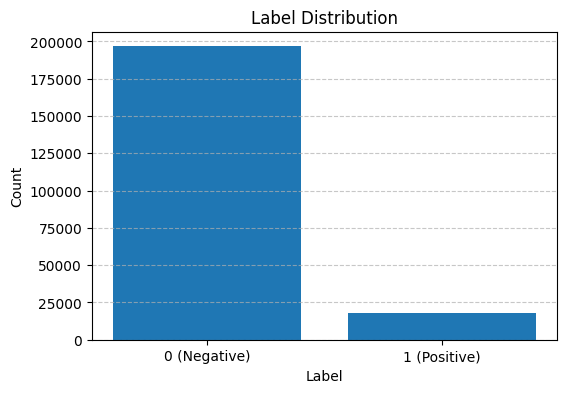

In [ ]:
import matplotlib.pyplot as plt

# Count of each label
label_counts = user_label_df['label'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['0 (Negative)', '1 (Positive)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
full_data

Index(['user_id', 'merchant_id', 'label'], dtype='object')

In [ ]:
# only keep the records that have [user_id, merchant_id] exist in the train-test dataset
user_log_filtered = user_log.merge(
    user_label_df['user_id'],
    on=['user_id'],
    how='inner'
)

In [ ]:
user_log_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   brand_id     float64
 4   merchant_id  int64  
 5   action       object 
 6   datetime     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.4+ GB


In [ ]:
user_log_filtered.head(5)

,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime
0,234512,146770,1173,3186.0,693,click,2024-06-25
1,234512,1106076,992,8165.0,3783,click,2024-10-16
2,234512,866567,1198,3186.0,693,click,2024-06-25
3,234512,146770,1173,3186.0,693,purchase,2024-06-25
4,234512,146770,1173,3186.0,693,click,2024-06-25


In [ ]:
user_log_filtered.columns

Index(['user_id', 'item_id', 'cat_id', 'brand_id', 'merchant_id', 'action',
       'datetime'],
      dtype='object')

In [ ]:
user_log_filtered_final = user_log_filtered[['user_id', 'action', 'datetime']].copy()
user_log_filtered_final['datetime'] = pd.to_datetime(user_log_filtered_final['datetime'])
user_log_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 3 columns):
 #   Column    Dtype         
---  ------    -----         
 0   user_id   int64         
 1   action    object        
 2   datetime  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 627.8+ MB


In [ ]:
print(f"Start time: {user_log_filtered_final['datetime'].min()}")
print(f"End time: {user_log_filtered_final['datetime'].max()}")

Start time: 2024-05-11 00:00:00
End time: 2024-11-12 00:00:00


In [ ]:
# Action counts

action_counts = (
    user_log_filtered_final
    .groupby(['user_id', 'action'])
    .size()                            # count each action
    .unstack(fill_value=0)             # convert actions to columns
    .reset_index()
)


In [ ]:
action_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      212062 non-null  int64
 1   add-to-cart  212062 non-null  int64
 2   click        212062 non-null  int64
 3   favourite    212062 non-null  int64
 4   purchase     212062 non-null  int64
dtypes: int64(5)
memory usage: 8.1 MB


In [ ]:
action_counts.head()

action,user_id,add-to-cart,click,favourite,purchase
0,1,0,27,0,6
1,4,0,49,0,1
2,6,0,217,15,17
3,7,0,6,0,8
4,8,0,61,7,23


In [ ]:
final_1 = user_label_df.copy()
final_1 = final_1.merge(action_counts, on="user_id", how="left")
final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214670 entries, 0 to 214669
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      214670 non-null  float64
 1   label        214670 non-null  float64
 2   add-to-cart  212062 non-null  float64
 3   click        212062 non-null  float64
 4   favourite    212062 non-null  float64
 5   purchase     212062 non-null  float64
dtypes: float64(6)
memory usage: 9.8 MB


In [ ]:
final_1.head()

,user_id,label,add-to-cart,click,favourite,purchase
0,393595.0,0.0,0.0,12.0,4.0,3.0
1,287580.0,0.0,0.0,25.0,0.0,1.0
2,203618.0,0.0,0.0,66.0,0.0,4.0
3,143560.0,0.0,0.0,106.0,10.0,7.0
4,324173.0,0.0,0.0,245.0,12.0,15.0


In [ ]:
action_counts.columns

Index(['user_id', 'merchant_id', 'add-to-cart', 'click', 'favourite',
       'purchase'],
      dtype='object', name='action')

In [ ]:
# Adding is_sale_day feature

# Define Shopee double-day mega sale days for time range above
sale_days = [
    "2024-05-15", "2024-05-25",
    "2024-06-06", "2024-06-15", "2024-06-25",
    "2024-07-07", "2024-07-15", "2024-07-25",
    "2024-08-08", "2024-08-15", "2024-08-25",
    "2024-09-02", "2024-09-09", "2024-09-15", "2024-09-25",
    "2024-10-10", "2024-10-15", "2024-10-20", "2024-10-25",
    "2024-11-11", "2024-11-15", "2024-11-25",
]

sale_days = pd.to_datetime(sale_days)

# Flag whether each row is a sale-day interaction
user_log_filtered_final['is_sale_day'] = user_log_filtered_final['datetime'].dt.normalize().isin(sale_days)

# # Adding date and month feature
# user_log_filtered_final['date'] = user_log_filtered_final['datetime'].dt.normalize()
# user_log_filtered_final['month'] = user_log_filtered_final['datetime'].dt.to_period('M')

user_log_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      int64         
 1   action       object        
 2   datetime     datetime64[ns]
 3   is_sale_day  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 654.0+ MB


In [ ]:
user_log_filtered_final.head()

,user_id,action,datetime,is_sale_day
0,234512,click,2024-06-25,True
1,234512,click,2024-10-16,False
2,234512,click,2024-06-25,True
3,234512,purchase,2024-06-25,True
4,234512,click,2024-06-25,True


In [ ]:
# Action count for sale and nosale days

agg_action_count_sale_nosale = (user_log_filtered_final
       .groupby(['user_id', 'is_sale_day', 'action'])
       .size()
       .reset_index(name='count'))

# Pivot table: sale_day vs non-sale & action counts
features_action_count_sale_nosale = agg_action_count_sale_nosale.pivot_table(
    index=['user_id'],
    columns=['is_sale_day', 'action'],
    values='count',
    fill_value=0
)

# Flatten column names
features_action_count_sale_nosale.columns = [
    f"{'sale' if sd else 'nosale'}_{act}"
    for sd, act in features_action_count_sale_nosale.columns
]

features_action_count_sale_nosale = features_action_count_sale_nosale.reset_index()


features_action_count_sale_nosale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             212062 non-null  int64  
 1   nosale_add-to-cart  212062 non-null  float64
 2   nosale_click        212062 non-null  float64
 3   nosale_favourite    212062 non-null  float64
 4   nosale_purchase     212062 non-null  float64
 5   sale_add-to-cart    212062 non-null  float64
 6   sale_click          212062 non-null  float64
 7   sale_favourite      212062 non-null  float64
 8   sale_purchase       212062 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 14.6 MB


In [ ]:
features_action_count_sale_nosale.head()

,user_id,nosale_add-to-cart,nosale_click,nosale_favourite,nosale_purchase,sale_add-to-cart,sale_click,sale_favourite,sale_purchase
0,1,0.0,14.0,0.0,2.0,0.0,13.0,0.0,4.0
1,4,0.0,38.0,0.0,0.0,0.0,11.0,0.0,1.0
2,6,0.0,190.0,14.0,14.0,0.0,27.0,1.0,3.0
3,7,0.0,5.0,0.0,1.0,0.0,1.0,0.0,7.0
4,8,0.0,48.0,6.0,12.0,0.0,13.0,1.0,11.0


In [ ]:
features_action_count_sale_nosale['sale_click_purchase'] = features_action_count_sale_nosale['sale_click'] / (features_action_count_sale_nosale['sale_purchase'] + 1)
features_action_count_sale_nosale['sale_fav_purchase'] = features_action_count_sale_nosale['sale_favourite'] / (features_action_count_sale_nosale['sale_purchase'] + 1)
features_action_count_sale_nosale['sale_add_purchase'] = features_action_count_sale_nosale['sale_add-to-cart'] / (features_action_count_sale_nosale['sale_purchase'] + 1)
features_action_count_sale_nosale['nosale_click_purchase'] = features_action_count_sale_nosale['nosale_click'] / (features_action_count_sale_nosale['nosale_purchase'] + 1)
features_action_count_sale_nosale['nosale_fav_purchase'] = features_action_count_sale_nosale['nosale_favourite'] / (features_action_count_sale_nosale['nosale_purchase'] + 1)
features_action_count_sale_nosale['nosale_add_purchase'] = features_action_count_sale_nosale['nosale_add-to-cart'] / (features_action_count_sale_nosale['nosale_purchase'] + 1)

In [ ]:
features_action_count_sale_nosale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                212062 non-null  int64  
 1   nosale_add-to-cart     212062 non-null  float64
 2   nosale_click           212062 non-null  float64
 3   nosale_favourite       212062 non-null  float64
 4   nosale_purchase        212062 non-null  float64
 5   sale_add-to-cart       212062 non-null  float64
 6   sale_click             212062 non-null  float64
 7   sale_favourite         212062 non-null  float64
 8   sale_purchase          212062 non-null  float64
 9   sale_click_purchase    212062 non-null  float64
 10  sale_fav_purchase      212062 non-null  float64
 11  sale_add_purchase      212062 non-null  float64
 12  nosale_click_purchase  212062 non-null  float64
 13  nosale_fav_purchase    212062 non-null  float64
 14  nosale_add_purchase    212062 non-nu

In [ ]:
features_action_count_sale_nosale.head()

,user_id,nosale_add-to-cart,nosale_click,nosale_favourite,nosale_purchase,sale_add-to-cart,sale_click,sale_favourite,sale_purchase,sale_purchase_click,...,sale_purchase_add,nosale_purchase_click,nosale_purchase_fav,nosale_purchase_add,sale_click_purchase,sale_fav_purchase,sale_add_purchase,nosale_click_purchase,nosale_fav_purchase,nosale_add_purchase
0,1,0.0,14.0,0.0,2.0,0.0,13.0,0.0,4.0,2.600000,...,0.0,4.666667,0.000000,0.0,2.600000,0.000000,0.0,4.666667,0.000000,0.0
1,4,0.0,38.0,0.0,0.0,0.0,11.0,0.0,1.0,5.500000,...,0.0,38.000000,0.000000,0.0,5.500000,0.000000,0.0,38.000000,0.000000,0.0
2,6,0.0,190.0,14.0,14.0,0.0,27.0,1.0,3.0,6.750000,...,0.0,12.666667,0.933333,0.0,6.750000,0.250000,0.0,12.666667,0.933333,0.0
3,7,0.0,5.0,0.0,1.0,0.0,1.0,0.0,7.0,0.125000,...,0.0,2.500000,0.000000,0.0,0.125000,0.000000,0.0,2.500000,0.000000,0.0
4,8,0.0,48.0,6.0,12.0,0.0,13.0,1.0,11.0,1.083333,...,0.0,3.692308,0.461538,0.0,1.083333,0.083333,0.0,3.692308,0.461538,0.0


In [ ]:
final_2 = final_1.copy()
final_2 = final_2.merge(features_action_count_sale_nosale[['user_id', 'sale_click_purchase', 'sale_fav_purchase', 'sale_add_purchase',
                                                  'nosale_click_purchase', 'nosale_fav_purchase', 'nosale_add_purchase']],
                                        on=['user_id'], how='left')
final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214670 entries, 0 to 214669
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                214670 non-null  float64
 1   label                  214670 non-null  float64
 2   add-to-cart            212062 non-null  float64
 3   click                  212062 non-null  float64
 4   favourite              212062 non-null  float64
 5   purchase               212062 non-null  float64
 6   sale_click_purchase    212062 non-null  float64
 7   sale_fav_purchase      212062 non-null  float64
 8   sale_add_purchase      212062 non-null  float64
 9   nosale_click_purchase  212062 non-null  float64
 10  nosale_fav_purchase    212062 non-null  float64
 11  nosale_add_purchase    212062 non-null  float64
dtypes: float64(12)
memory usage: 19.7 MB


In [ ]:
user_log_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      int64         
 1   action       object        
 2   datetime     datetime64[ns]
 3   is_sale_day  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 654.0+ MB


In [ ]:
# Purchase count in no_sale and sale days

df_purchase = user_log_filtered_final[user_log_filtered_final['action'] == 'purchase'].copy().reset_index(drop=True)
df_purchase['month'] = df_purchase['datetime'].dt.to_period('M')
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643970 entries, 0 to 1643969
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   user_id      1643970 non-null  int64         
 1   action       1643970 non-null  object        
 2   datetime     1643970 non-null  datetime64[ns]
 3   is_sale_day  1643970 non-null  bool          
 4   month        1643970 non-null  period[M]     
dtypes: bool(1), datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 51.7+ MB


In [ ]:
monthly_purchase = df_purchase.groupby(['user_id', 'month', 'is_sale_day']).size().reset_index(name='count')
monthly_purchase.head()

,user_id,month,is_sale_day,count
0,1,2024-10,False,2
1,1,2024-11,True,4
2,4,2024-11,True,1
3,6,2024-06,False,3
4,6,2024-07,False,4


In [ ]:
# Pivot table: sale_day vs non-sale & action counts
features2 = monthly_purchase.pivot_table(
    index=['user_id'],
    columns=['is_sale_day', 'month'],
    values='count',
    fill_value=0
)

# Flatten column names
features2.columns = [
    f"{'sale' if sd else 'nosale'}_{act}"
    for sd, act in features2.columns
]

features2 = features2.reset_index()
features2.head()

,user_id,nosale_2024-05,nosale_2024-06,nosale_2024-07,nosale_2024-08,nosale_2024-09,nosale_2024-10,nosale_2024-11,sale_2024-05,sale_2024-06,sale_2024-07,sale_2024-08,sale_2024-09,sale_2024-10,sale_2024-11
0,1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6,0.0,3.0,4.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,8,1.0,2.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0,1.0


In [ ]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         212062 non-null  int64  
 1   nosale_2024-05  212062 non-null  float64
 2   nosale_2024-06  212062 non-null  float64
 3   nosale_2024-07  212062 non-null  float64
 4   nosale_2024-08  212062 non-null  float64
 5   nosale_2024-09  212062 non-null  float64
 6   nosale_2024-10  212062 non-null  float64
 7   nosale_2024-11  212062 non-null  float64
 8   sale_2024-05    212062 non-null  float64
 9   sale_2024-06    212062 non-null  float64
 10  sale_2024-07    212062 non-null  float64
 11  sale_2024-08    212062 non-null  float64
 12  sale_2024-09    212062 non-null  float64
 13  sale_2024-10    212062 non-null  float64
 14  sale_2024-11    212062 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 24.3 MB


In [ ]:
features2['purchase_ratio_06'] = features2['sale_2024-06'] / (features2['nosale_2024-06'] + 1)
features2['purchase_ratio_07'] = features2['sale_2024-07'] / (features2['nosale_2024-07'] + 1)
features2['purchase_ratio_08'] = features2['sale_2024-08'] / (features2['nosale_2024-08'] + 1)
features2['purchase_ratio_09'] = features2['sale_2024-09'] / (features2['nosale_2024-09'] + 1)
features2['purchase_ratio_10'] = features2['sale_2024-10'] / (features2['nosale_2024-10'] + 1)
features2['purchase_ratio_11'] = features2['sale_2024-11'] / (features2['nosale_2024-11'] + 1)
features2['purchase_ratio'] = (features2['purchase_ratio_06']
                               + features2['purchase_ratio_07']
                               + features2['purchase_ratio_08']
                               + features2['purchase_ratio_09']
                               + features2['purchase_ratio_10']
                               + features2['purchase_ratio_11']) / 6

In [ ]:
final_3 = final_2.copy()
final_3 = final_3.merge(features2[['user_id', 'purchase_ratio']], on='user_id', how='left')
final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214670 entries, 0 to 214669
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                214670 non-null  float64
 1   label                  214670 non-null  float64
 2   add-to-cart            212062 non-null  float64
 3   click                  212062 non-null  float64
 4   favourite              212062 non-null  float64
 5   purchase               212062 non-null  float64
 6   sale_click_purchase    212062 non-null  float64
 7   sale_fav_purchase      212062 non-null  float64
 8   sale_add_purchase      212062 non-null  float64
 9   nosale_click_purchase  212062 non-null  float64
 10  nosale_fav_purchase    212062 non-null  float64
 11  nosale_add_purchase    212062 non-null  float64
 12  purchase_ratio         212062 non-null  float64
dtypes: float64(13)
memory usage: 21.3 MB


In [ ]:
user_log_3 = user_log_filtered_final.copy()
user_log_3['date'] = user_log_3['datetime'].dt.normalize()
user_log_3['month'] = user_log_3['datetime'].dt.to_period('M')
user_log_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      int64         
 1   action       object        
 2   datetime     datetime64[ns]
 3   is_sale_day  bool          
 4   date         object        
 5   month        period[M]     
dtypes: bool(1), datetime64[ns](1), int64(1), object(2), period[M](1)
memory usage: 1.0+ GB


In [ ]:
user_log_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      int64         
 1   action       object        
 2   datetime     datetime64[ns]
 3   is_sale_day  bool          
 4   date         datetime64[ns]
 5   month        period[M]     
dtypes: bool(1), datetime64[ns](2), int64(1), object(1), period[M](1)
memory usage: 1.0+ GB


In [ ]:
monthly_stats = user_log_3.groupby(['user_id', 'month']).agg(
    total_actions=('action', 'count'),
    active_days=('date', lambda x: x.nunique())
).reset_index()

monthly_stats['actions_days'] = monthly_stats['total_actions'] / monthly_stats['active_days']
monthly_stats.head()

,user_id,month,total_actions,active_days,actions_days
0,1,2024-10,16,4,4.0
1,1,2024-11,17,1,17.0
2,4,2024-05,12,1,12.0
3,4,2024-07,12,3,4.0
4,4,2024-09,7,2,3.5


In [ ]:
monthly_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057920 entries, 0 to 1057919
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype    
---  ------         --------------    -----    
 0   user_id        1057920 non-null  int64    
 1   month          1057920 non-null  period[M]
 2   total_actions  1057920 non-null  int64    
 3   active_days    1057920 non-null  int64    
 4   actions_days   1057920 non-null  float64  
dtypes: float64(1), int64(3), period[M](1)
memory usage: 40.4 MB


In [ ]:
monthly_stats_avg = (
    monthly_stats.groupby('user_id', as_index=False)
      .agg(
          avg_action_day_ratio=('actions_days', 'mean'),
          avg_active_day=('active_days', 'mean')
      )
)
monthly_stats_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               212062 non-null  int64  
 1   avg_action_day_ratio  212062 non-null  float64
 2   avg_active_day        212062 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 4.9 MB


In [ ]:
final_4 = final_3.copy()
final_4 = final_4.merge(monthly_stats_avg, on='user_id', how='inner')
final_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                212062 non-null  float64
 1   label                  212062 non-null  float64
 2   add-to-cart            212062 non-null  float64
 3   click                  212062 non-null  float64
 4   favourite              212062 non-null  float64
 5   purchase               212062 non-null  float64
 6   sale_click_purchase    212062 non-null  float64
 7   sale_fav_purchase      212062 non-null  float64
 8   sale_add_purchase      212062 non-null  float64
 9   nosale_click_purchase  212062 non-null  float64
 10  nosale_fav_purchase    212062 non-null  float64
 11  nosale_add_purchase    212062 non-null  float64
 12  purchase_ratio         212062 non-null  float64
 13  avg_action_day_ratio   212062 non-null  float64
 14  avg_active_day         212062 non-nu

In [ ]:
final_4.to_csv("/content/drive/MyDrive/AI Project/final_4.csv", index=False)

In [ ]:
user_log_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27429503 entries, 0 to 27429502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      int64         
 1   action       object        
 2   datetime     datetime64[ns]
 3   is_sale_day  bool          
 4   date         datetime64[ns]
 5   month        period[M]     
dtypes: bool(1), datetime64[ns](2), int64(1), object(1), period[M](1)
memory usage: 1.0+ GB


In [ ]:
user_log_4 = user_log_3.copy()
# Sort theo user_id, merchant_id và datetime
user_log_4 = user_log_3.sort_values(['user_id', 'datetime'])

# Tính chênh lệch ngày giữa các hoạt động
user_log_4['activity_gap'] = user_log_4.groupby(['user_id'])['date'].diff().dt.days

global_max_date = user_log_4['date'].max()


In [ ]:
# 4. Aggregate: lấy max internal gap và last_date cho mỗi cặp
agg = (
    user_log_4.groupby(['user_id'])
       .agg(
           max_internal_gap = ('activity_gap', 'max'),  # có thể NaN nếu chỉ 1 log
           last_date = ('date', 'max')
       )
       .reset_index()
)

# 5. Chuyển NaN max_internal_gap -> 0 (để dễ so sánh)
agg['max_internal_gap'] = agg['max_internal_gap'].fillna(0)

# 6. Tính last_gap (khoảng từ last_date tới global_max_date)
agg['last_gap'] = (global_max_date - agg['last_date']).dt.days

# 7. Lấy max giữa max_internal_gap và last_gap
agg['longest_inactivity_days'] = agg[['max_internal_gap','last_gap']].max(axis=1).astype(int)

# 8. (Tuỳ chọn) giữ các cột cần thiết
longest_gap = agg[['user_id','longest_inactivity_days']]

longest_gap.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   user_id                  212062 non-null  int64
 1   longest_inactivity_days  212062 non-null  int64
dtypes: int64(2)
memory usage: 3.2 MB


In [ ]:
longest_gap.head()

,user_id,longest_inactivity_days
0,1,21
1,4,53
2,6,16
3,7,115
4,8,24


In [ ]:
final_5 = final_4.copy()
final_5 = final_5.merge(longest_gap, on='user_id', how='inner')
final_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  212062 non-null  float64
 1   label                    212062 non-null  float64
 2   add-to-cart              212062 non-null  float64
 3   click                    212062 non-null  float64
 4   favourite                212062 non-null  float64
 5   purchase                 212062 non-null  float64
 6   sale_click_purchase      212062 non-null  float64
 7   sale_fav_purchase        212062 non-null  float64
 8   sale_add_purchase        212062 non-null  float64
 9   nosale_click_purchase    212062 non-null  float64
 10  nosale_fav_purchase      212062 non-null  float64
 11  nosale_add_purchase      212062 non-null  float64
 12  purchase_ratio           212062 non-null  float64
 13  avg_action_day_ratio     212062 non-null  float64
 14  avg_

In [ ]:
final_5.to_csv("/content/drive/MyDrive/AI Project/final_5.csv", index=False)

In [ ]:
# Lọc hành động mua
df_purchase_new = user_log_4[user_log_4['action'] == 'purchase'].copy()

# Sort theo user_id, merchant_id và datetime
df_purchase_new = df_purchase_new.sort_values(['user_id', 'datetime'])

# Tính chênh lệch ngày giữa các hoạt động
df_purchase_new['purchase_gap'] = df_purchase_new.groupby(['user_id'])['date'].diff().dt.days

global_max_date = user_log_4['date'].max()

# 4. Aggregate: lấy max internal gap và last_date cho mỗi cặp
agg = (
    df_purchase_new.groupby(['user_id'])
       .agg(
           max_internal_gap = ('purchase_gap', 'max'),  # có thể NaN nếu chỉ 1 log
           last_date = ('date', 'max')
       )
       .reset_index()
)

# 5. Chuyển NaN max_internal_gap -> 0 (để dễ so sánh)
agg['max_internal_gap'] = agg['max_internal_gap'].fillna(0)

# 6. Tính last_gap (khoảng từ last_date tới global_max_date)
agg['last_gap'] = (global_max_date - agg['last_date']).dt.days

# 7. Lấy max giữa max_internal_gap và last_gap
agg['longest_purchase_gap'] = agg[['max_internal_gap','last_gap']].max(axis=1).astype(int)

# 8. (Tuỳ chọn) giữ các cột cần thiết
longest_purchase_gap = agg[['user_id', 'longest_purchase_gap']]


In [ ]:
longest_purchase_gap.head()

,user_id,longest_purchase_gap
0,1,21
1,4,1
2,6,37
3,7,1
4,8,39


In [ ]:
final_6 = final_5.copy()
final_6 = final_6.merge(longest_purchase_gap, on='user_id', how='inner')
final_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  212062 non-null  float64
 1   label                    212062 non-null  float64
 2   add-to-cart              212062 non-null  float64
 3   click                    212062 non-null  float64
 4   favourite                212062 non-null  float64
 5   purchase                 212062 non-null  float64
 6   sale_click_purchase      212062 non-null  float64
 7   sale_fav_purchase        212062 non-null  float64
 8   sale_add_purchase        212062 non-null  float64
 9   nosale_click_purchase    212062 non-null  float64
 10  nosale_fav_purchase      212062 non-null  float64
 11  nosale_add_purchase      212062 non-null  float64
 12  purchase_ratio           212062 non-null  float64
 13  avg_action_day_ratio     212062 non-null  float64
 14  avg_

In [ ]:
user_info = pd.read_csv("/content/drive/MyDrive/AI Project/user_info_final.csv")

In [ ]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422741 entries, 0 to 422740
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         422741 non-null  int64  
 1   age             422741 non-null  float64
 2   sex             422741 non-null  object 
 3   marital_status  422741 non-null  object 
 4   job_industry    422741 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 16.1+ MB


In [ ]:
data_for_classification = final_6.copy()
data_for_classification = data_for_classification.merge(user_info, on='user_id', how='left')
data_for_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212062 entries, 0 to 212061
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  212062 non-null  float64
 1   label                    212062 non-null  float64
 2   add-to-cart              212062 non-null  float64
 3   click                    212062 non-null  float64
 4   favourite                212062 non-null  float64
 5   purchase                 212062 non-null  float64
 6   sale_click_purchase      212062 non-null  float64
 7   sale_fav_purchase        212062 non-null  float64
 8   sale_add_purchase        212062 non-null  float64
 9   nosale_click_purchase    212062 non-null  float64
 10  nosale_fav_purchase      212062 non-null  float64
 11  nosale_add_purchase      212062 non-null  float64
 12  purchase_ratio           212062 non-null  float64
 13  avg_action_day_ratio     212062 non-null  float64
 14  avg_

In [ ]:
data_for_classification.to_csv("/content/drive/MyDrive/AI Project/data_for_classification.csv", index=False)